#Import Lib

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Load data

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
%cd /content/drive/MyDrive/Colab Notebooks/VGU AI/Softmax Regression

/content/drive/MyDrive/Colab Notebooks/VGU AI/Softmax Regression


In [4]:
dataset_path='creditcard.csv'
df=pd.read_csv(
    dataset_path
)

In [5]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [6]:
dataset_arr=df.to_numpy()
X,y=dataset_arr[:,:-1].astype(np.float64),dataset_arr[:,-1].astype(np.uint8)

In [7]:
#add bias into X
tmp=np.ones((X.shape[0],1))
X=np.concatenate((tmp,X),axis=1)

In [13]:
#one-hot encode y
n_classes=np.unique(y).size
n_samples=y.shape[0]
y_encoded=np.zeros((n_samples,n_classes))
y_encoded[np.arange(n_samples),y]= 1

In [14]:
#split dataset into train,validation, and test
val_size=0.2
test_size=0.125
random_state=2
shuffle=True
X_train,X_val,y_train,y_val=train_test_split(
    X,y_encoded,
    test_size=test_size,
    random_state=random_state,
    shuffle=shuffle
)
X_train,X_test,y_train,y_test=train_test_split(
    X_train,y_train,
    test_size=val_size,
    shuffle=shuffle
)

In [15]:
y_train

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [16]:
#normalize data
normalizer=StandardScaler()
X_train[:,1:]=normalizer.fit_transform(X_train[:,1:])
X_val[:,1:]=normalizer.transform(X_val[:,1:])
X_test[:,1:]=normalizer.transform(X_test[:,1:])

#Define modules

In [ ]:
def softmax(z):
    exp_z=np.exp(z)
    return exp_z/(exp_z).sum(axis=1).reshape(-1,1)

In [ ]:
def predict(X,W):
    return softmax(np.dot(X,W))

In [ ]:
def compute_loss(y_hat,y):
    return (-1/y.size)*np.sum(y*np.log(y_hat))

In [ ]:
def compute_accuracy(y_hat,y):
    return (np.argmax(y_hat,axis=1)==np.argmax(y,axis=1)).mean()

In [ ]:
def compute_gradient(X,y_hat,y):
    return np.dot(X.T,(y_hat-y))/y.size

In [ ]:
def update_W(W,gradient,lr):
    return W-lr*gradient

#Model

In [ ]:
#init
lr=0.01
epochs=50
batch_size=1024

np.random.seed(random_state)
n_features=X_train.shape[1]
n_classes=y_train.shape[1]
W=np.random.uniform(size=(n_features,n_classes))

In [ ]:
train_losses=[]
train_accs=[]
val_losses=[]
val_accs=[]
for epoch in range(epochs):
    train_batch_losses=[]
    train_batch_accs=[]
    val_batch_losses=[]
    val_batch_accs=[]
    for i in range(0,X_train.shape[0],batch_size):
        X_batch=X_train[i:i+batch_size]
        y_batch=y_train[i:i+batch_size]

        #train
        y_hat=predict(X_batch,W)
        train_batch_losses.append(compute_loss(y_hat,y_batch))
        train_batch_accs.append(compute_accuracy(y_hat,y_batch))

        #validate
        y_hat_val=predict(X_val,W)
        val_batch_losses.append(compute_loss(y_hat_val,y_val))
        val_batch_accs.append(compute_accuracy(y_hat_val,y_val))

        #gradient descent
        gradient=compute_gradient(X_batch,y_hat,y_batch)
        W=update_W(W,gradient,lr)

    train_losses.append(np.array(train_batch_losses).mean())
    train_accs.append(np.array(train_batch_accs).mean())
    val_losses.append(np.array(val_batch_losses).mean())
    val_accs.append(np.array(val_batch_accs).mean())
    print(f'EPOCH {epoch+1}:\tTraning Loss: {train_losses[-1]:.3f}\tValidation Loss: {val_losses[-1]:.3f}')


EPOCH 1:	Traning Loss: 0.300	Validation Loss: 0.296
EPOCH 2:	Traning Loss: 0.176	Validation Loss: 0.173
EPOCH 3:	Traning Loss: 0.115	Validation Loss: 0.112
EPOCH 4:	Traning Loss: 0.081	Validation Loss: 0.080
EPOCH 5:	Traning Loss: 0.062	Validation Loss: 0.061
EPOCH 6:	Traning Loss: 0.049	Validation Loss: 0.049
EPOCH 7:	Traning Loss: 0.041	Validation Loss: 0.041
EPOCH 8:	Traning Loss: 0.035	Validation Loss: 0.035
EPOCH 9:	Traning Loss: 0.031	Validation Loss: 0.031
EPOCH 10:	Traning Loss: 0.028	Validation Loss: 0.027
EPOCH 11:	Traning Loss: 0.025	Validation Loss: 0.025
EPOCH 12:	Traning Loss: 0.023	Validation Loss: 0.023
EPOCH 13:	Traning Loss: 0.021	Validation Loss: 0.021
EPOCH 14:	Traning Loss: 0.020	Validation Loss: 0.020
EPOCH 15:	Traning Loss: 0.018	Validation Loss: 0.018
EPOCH 16:	Traning Loss: 0.017	Validation Loss: 0.017
EPOCH 17:	Traning Loss: 0.016	Validation Loss: 0.016
EPOCH 18:	Traning Loss: 0.016	Validation Loss: 0.015
EPOCH 19:	Traning Loss: 0.015	Validation Loss: 0.015
EP

#Evaluation

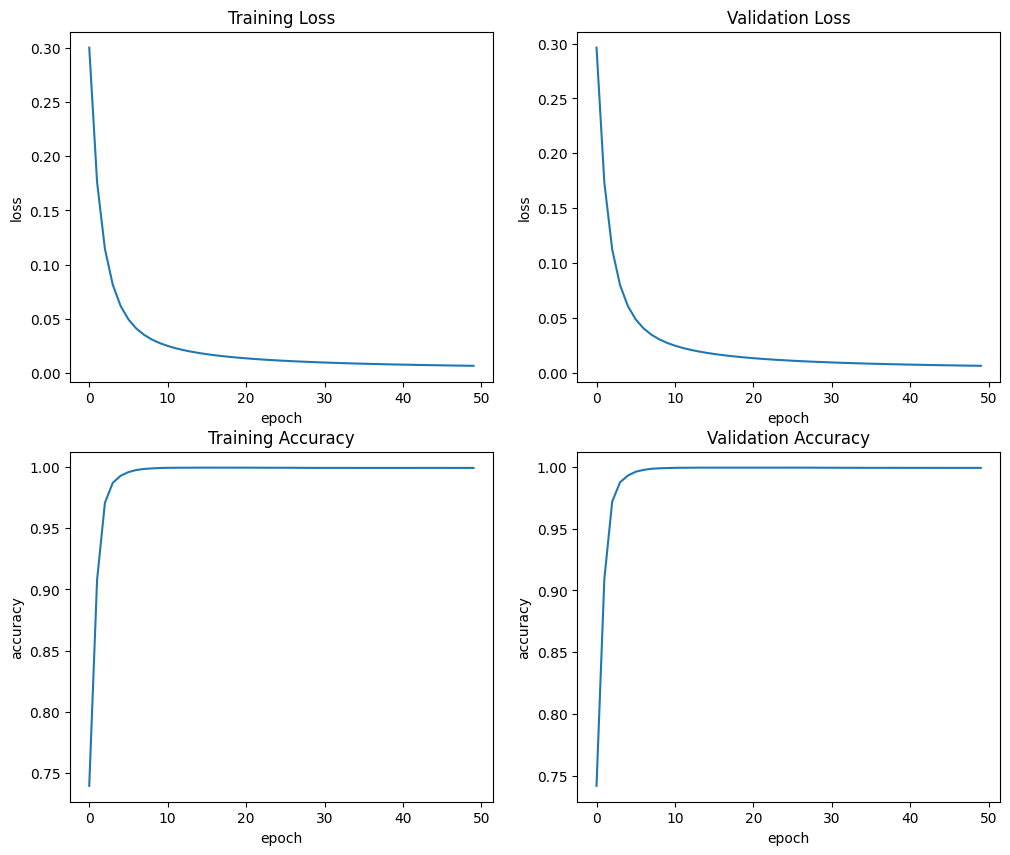

In [ ]:
fig,ax=plt.subplots(2,2,figsize=(12,10))
ax[0,0].plot(train_losses)
ax[0,0].set(xlabel='epoch',ylabel='loss')
ax[0,0].set_title('Training Loss')

ax[0,1].plot(val_losses)
ax[0,1].set(xlabel='epoch',ylabel='loss')
ax[0,1].set_title('Validation Loss')

ax[1,0].plot(train_accs)
ax[1,0].set(xlabel='epoch',ylabel='accuracy')
ax[1,0].set_title('Training Accuracy')

ax[1,1].plot(val_accs)
ax[1,1].set(xlabel='epoch',ylabel='accuracy')
ax[1,1].set_title('Validation Accuracy')
plt.show()

In [ ]:
y_hat_test=predict(X_test,W)
print(f'Loss: {compute_loss(y_hat_test,y_test)}\tAccuracy: {compute_accuracy(y_hat_test,y_test)}')

Loss: 0.007067301787949716	Accuracy: 0.9990570201837807


In [ ]:
#test performance with F1 score
def compute_f1(y_hat,y):
    actual=np.argmax(y,axis=1)
    predict=np.argmax(y_hat,axis=1)
    print(actual,predict)
    true_pos=np.sum(actual+predict==2)
    false_neg=np.sum(actual>predict)
    false_pos=np.sum(actual<predict)
    true_neg=np.sum(actual+predict==0)
    print(true_pos,false_neg,false_pos,true_neg)
    P=true_pos/(true_pos+false_pos) #precision
    R=true_pos/(true_pos+false_neg) #recall
    print(P,R)
    return 2*P*R/(P+R)

In [ ]:
compute_f1(y_hat_test,y_test)

[0 0 0 ... 0 0 0] [0 0 0 ... 0 0 0]
53 36 11 49742
0.828125 0.5955056179775281


0.69281045751634